In [11]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS

In [26]:
tweets_df = pd.read_csv('./Downloads/blockchain_tweets.csv')

In [27]:
print(f"data shape: {tweets_df.shape}")

data shape: (10000, 13)


In [28]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
user_name           10000 non-null object
user_location       3633 non-null object
user_description    8596 non-null object
user_created        10000 non-null object
user_followers      10000 non-null int64
user_friends        10000 non-null int64
user_favourites     10000 non-null int64
user_verified       10000 non-null bool
date                10000 non-null object
text                10000 non-null object
hashtags            6073 non-null object
source              10000 non-null object
is_retweet          10000 non-null bool
dtypes: bool(2), int64(3), object(8)
memory usage: 879.0+ KB


In [29]:
tweets_df.describe()

user_followers  user_friends  user_favourites
count    1.000000e+04   10000.00000     10000.000000
mean     3.084688e+03    1456.17030      3834.572600
std      4.769006e+04    6460.67404     11971.127161
min      0.000000e+00       0.00000         0.000000
25%      3.900000e+01      34.00000        52.000000
50%      3.015000e+02     319.00000       515.500000
75%      1.036250e+03    1375.25000      2382.250000
max      3.215958e+06  379452.00000    213322.000000

In [30]:
tweets_df.head()

user_name user_location  \
0                                Blockwork           NaN   
1                                   Rib-It           NaN   
2  â¤ï¸LacedWhales (CARDANO POOL: PEACE)           NaN   
3                        Wiscobus Ntukuyoh        Lagos    
4                                   Rib-It           NaN   

                                    user_description  \
0  Find a job in blockchain: https://t.co/7X6K6WK...   
1  ðŸ¸ RibIt 2021 YOU are the foundation of our ...   
2  1M+ $ADA whale txs laced with â¤ï¸ from La @...   
3  Crypto Analyst |Crypto ambassador |$FIL,$DASH|...   
4  ðŸ¸ RibIt 2021 YOU are the foundation of our ...   

                user_created  user_followers  user_friends  user_favourites  \
0  2018-02-25 19:11:34+00:00             237           331                2   
1  2021-09-19 22:05:58+00:00            1819          2221              266   
2  2020-08-21 11:38:22+00:00             617             3               52   
3  2018-04-25 23:23:16+00:00            1114          4616              422   
4  2021-09-19 22:05:58+00:00            1819          2221              266   

   user_verified                       date  \
0          False  2021-11-14 20:02:49+00:00   
1          False  2021-11-14 20:02:30+00:00   
2          False  2021-11-14 20:02:24+00:00   
3          False  2021-11-14 20:02:20+00:00   
4          False  2021-11-14 20:02:18+00:00   

                                                text  \
0  #blockchain Y I N C. C O M is hiring for the f...   
1  Check out this account on OpenSea https://t.co...   
2  ðŸ³ #Cardano $ADA Whale â¤ï¸laced!\nðŸ’° Tr...   
3  ðŸŒˆ Hop over to #Coinstore's App to trade now...   
4  Check out this account on OpenSea https://t.co...   

                                            hashtags               source  \
0                                     ['blockchain']         blockwork_ai   
1  ['nfts', 'nft', 'nftart', 'nftartist', 'nftcol...      Twitter Web App   
2                                        ['Cardano']     laced-whales-dev   
3  ['Coinstore', 'CHZ', 'USDT', 'DENT', 'USDT', '...  Twitter for Android   
4  ['nfts', 'nft', 'nftart', 'nftartist', 'nftcol...      Twitter Web App   

   is_retweet  
0       False  
1       False  
2       False  
3       False  
4       False

In [31]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [32]:
missing_data(tweets_df)

user_name user_location user_description user_created user_followers  \
Total           0          6367             1404            0              0   
Percent         0         63.67            14.04            0              0   
Types      object        object           object       object          int64   

        user_friends user_favourites user_verified    date    text hashtags  \
Total              0               0             0       0       0     3927   
Percent            0               0             0       0       0    39.27   
Types          int64           int64          bool  object  object   object   

         source is_retweet  
Total         0          0  
Percent       0          0  
Types    object       bool

In [33]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [34]:
unique_values(tweets_df)

user_name  user_location  user_description  user_created  \
Total        10000           3633              8596         10000   
Uniques       4997           1226              3884          5052   

         user_followers  user_friends  user_favourites  user_verified   date  \
Total             10000         10000            10000          10000  10000   
Uniques            1803          2203             2770              2   9177   

          text  hashtags  source  is_retweet  
Total    10000      6073   10000       10000  
Uniques   9697      2333     152           1

In [35]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [36]:
most_frequent_values(tweets_df)

user_name  \
Total                                                 10000   
Most frequent item  â¤ï¸LacedWhales (CARDANO POOL: PEACE)   
Frequence                                              1340   
Percent from total                                     13.4   

                        user_location  \
Total                            3633   
Most frequent item  Dhaka, Bangladesh   
Frequence                         170   
Percent from total              4.679   

                                                     user_description  \
Total                                                            8596   
Most frequent item  1M+ $ADA whale txs laced with â¤ï¸ from La @...   
Frequence                                                        1340   
Percent from total                                             15.589   

                                 user_created user_followers user_friends  \
Total                                   10000          10000        10000   
Most frequent item  2020-08-21 11:38:22+00:00            617            3   
Frequence                                1340           1344         1358   
Percent from total                       13.4          13.44        13.58   

                   user_favourites user_verified                       date  \
Total                        10000         10000                      10000   
Most frequent item              52         False  2021-11-14 18:30:00+00:00   
Frequence                     1348          9974                          5   
Percent from total           13.48         99.74                       0.05   

                                                                 text  \
Total                                                           10000   
Most frequent item  @swisscpayment Hopefully this project is a suc...   
Frequence                                                          17   
Percent from total                                               0.17   

                       hashtags               source is_retweet  
Total                      6073                10000      10000  
Most frequent item  ['Cardano']  Twitter for Android      False  
Frequence                  1343                 3265      10000  
Percent from total       22.114                32.65        100

In [37]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0, flags=flags)


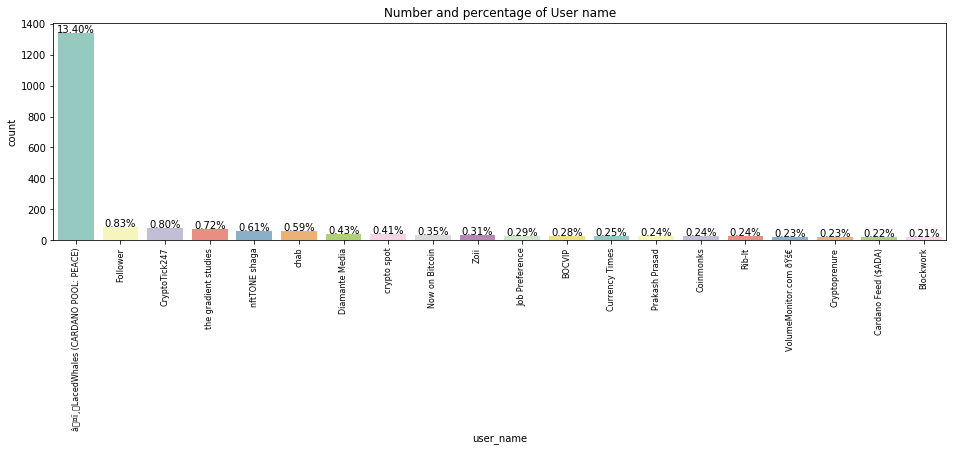

In [38]:
plot_count("user_name", "User name", tweets_df,4)

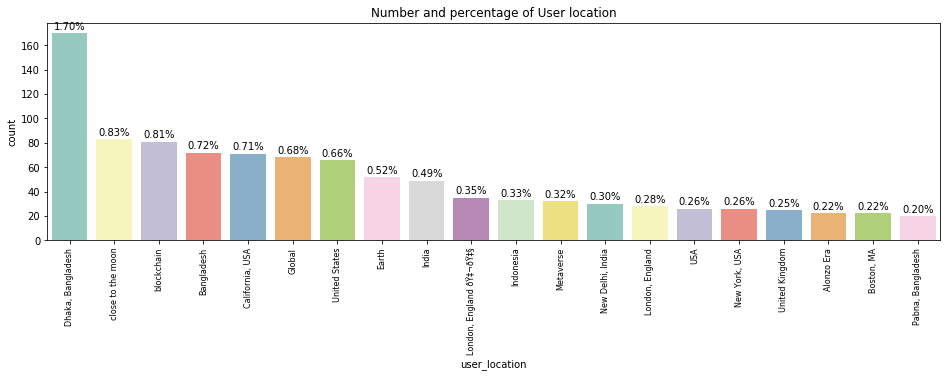

In [39]:
plot_count("user_location", "User location", tweets_df,4)

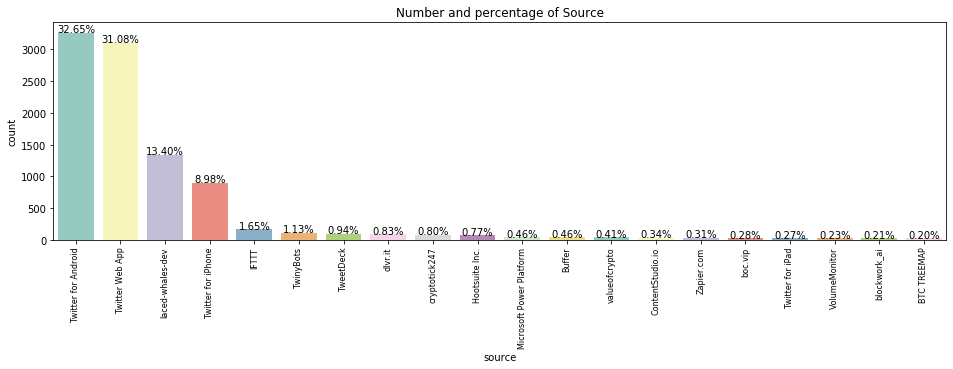

In [40]:
plot_count("source", "Source", tweets_df,4)

In [41]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

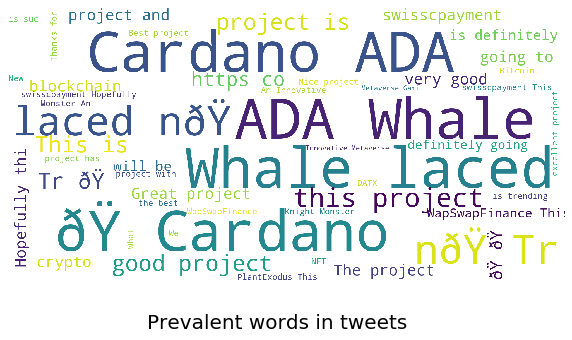

In [42]:
show_wordcloud(tweets_df['text'], title = 'Prevalent words in tweets')

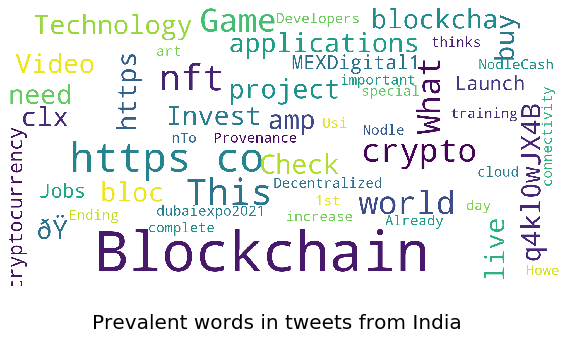

In [43]:
india_df = tweets_df.loc[tweets_df.user_location=="India"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

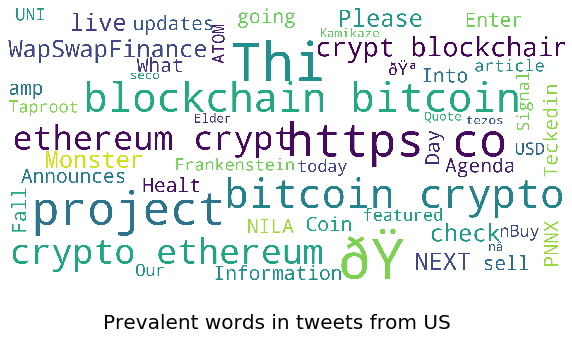

In [44]:
us_df = tweets_df.loc[tweets_df.user_location=="United States"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from US')

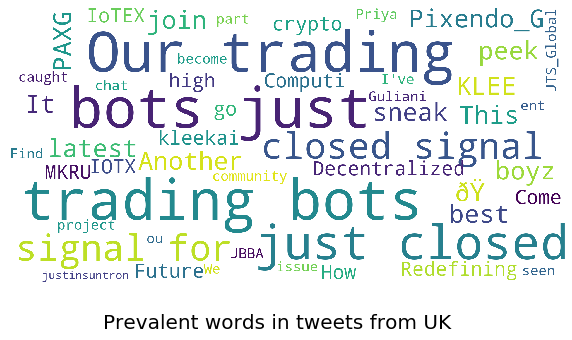

In [45]:
us_df = tweets_df.loc[tweets_df.user_location=="United Kingdom"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from UK')

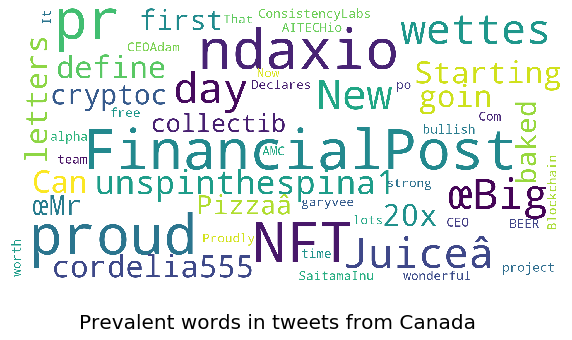

In [46]:
us_df = tweets_df.loc[tweets_df.user_location=="Canada"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from Canada')

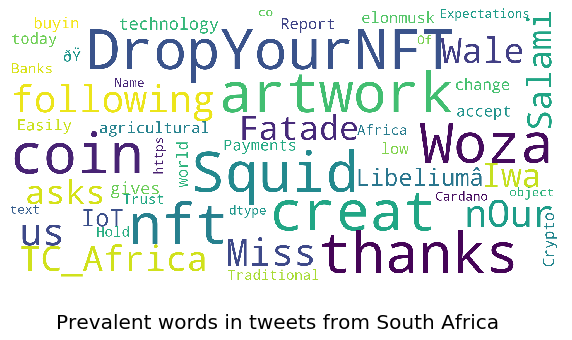

In [47]:
india_df = tweets_df.loc[tweets_df.user_location=="South Africa"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from South Africa')

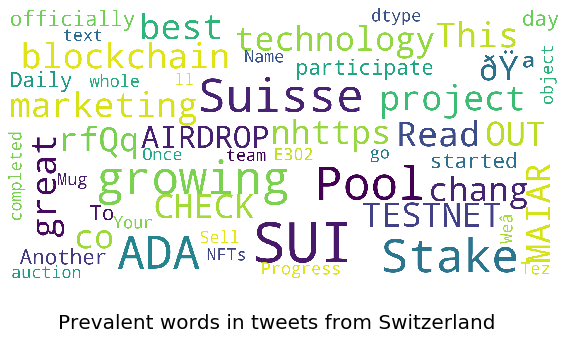

In [48]:
india_df = tweets_df.loc[tweets_df.user_location=="Switzerland"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from Switzerland')

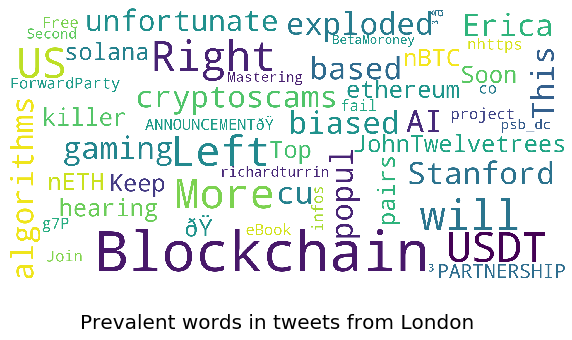

In [49]:
us_df = tweets_df.loc[tweets_df.user_location=="London"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from London')

In [50]:
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()


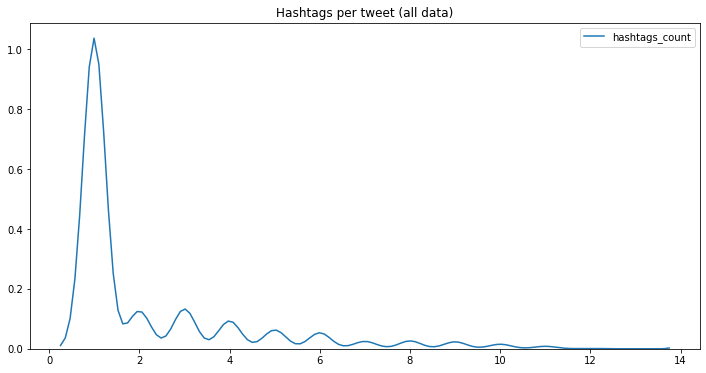

In [51]:
tweets_df['hashtags'] = tweets_df['hashtags'].replace(np.nan, "['None']", regex=True)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.replace('\\N',''))
tweets_df['hashtags_count'] = tweets_df['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tweets_df)

In [52]:
tweets_df['hashtags_individual'] = tweets_df['hashtags'].apply(lambda x: x.split(','))
from itertools import chain
all_hashtags = set(chain.from_iterable(list(tweets_df['hashtags_individual'])))
print(f"There are totally: {len(all_hashtags)}")

There are totally: 3196


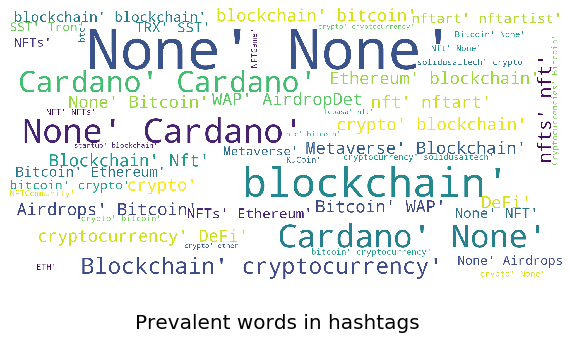

In [53]:
show_wordcloud(tweets_df['hashtags_individual'], title = 'Prevalent words in hashtags')

In [58]:
country_df = pd.read_csv("./Downloads/wikipedia-iso-country-codes.csv")

In [59]:
country_df.columns = ["country", "alpha2", "alpha3", "numeric", "iso"]
country_df.head()

country alpha2 alpha3  numeric            iso
0     Afghanistan     AF    AFG        4  ISO 3166-2:AF
1  Ã…land Islands     AX    ALA      248  ISO 3166-2:AX
2         Albania     AL    ALB        8  ISO 3166-2:AL
3         Algeria     DZ    DZA       12  ISO 3166-2:DZ
4  American Samoa     AS    ASM       16  ISO 3166-2:AS

In [60]:
tweets_df['country'] = tweets_df['user_location']

In [61]:
tweets_df = tweets_df.merge(country_df, on="country")

In [62]:
tweets_df.head(10)

user_name   user_location  \
0                                    Putra  United Kingdom   
1                          Aurora Research  United Kingdom   
2          ÐœÐ¸Ñ…Ð°Ð»Ñ‹Ñ‡ ðŸ‡·ðŸ‡ºðŸ‡¬ðŸ‡§  United Kingdom   
3                                 Richey86  United Kingdom   
4       The British Blockchain Association  United Kingdom   
5                          Aurora Research  United Kingdom   
6                         FinTech Alliance  United Kingdom   
7                             Hutar Conner  United Kingdom   
8  Tractorboy ðŸ´ó §ó ¢ó ¥ó ®ó §ó ¿  United Kingdom   
9                                 Richey86  United Kingdom   

                                    user_description  \
0                                SantÃ­sima Trinidad   
1  Crypto Signals generated by science & AI. Find...   
2  if u send me one #dogecoin I will more happy ð...   
3  Hey everybody and welcome! Gamer and crypto en...   
4  The official account of The British Blockchain...   
5  Crypto Signals generated by science & AI. Find...   
6  Discover. Connect. Prosper. \n\nThe Government...   
7  There may be other currencies like it that may...   
8                                                NaN   
9  Hey everybody and welcome! Gamer and crypto en...   

                user_created  user_followers  user_friends  user_favourites  \
0  2013-11-01 13:45:36+00:00           24460           270             2431   
1  2020-08-25 08:53:23+00:00             486           675                0   
2  2021-05-16 22:11:40+00:00             151            46            11466   
3  2020-12-15 06:06:33+00:00             334           105             2923   
4  2017-10-25 20:41:56+00:00            2899           373             5869   
5  2020-08-25 08:53:23+00:00             486           675                0   
6  2019-02-27 12:44:11+00:00            2629           729             3987   
7  2021-04-10 08:27:08+00:00            3067          4072              408   
8  2019-06-13 22:56:45+00:00            1092           763            12669   
9  2020-12-15 06:06:33+00:00             334           105             2923   

   user_verified                       date  \
0          False  2021-11-14 20:01:42+00:00   
1          False  2021-11-14 18:01:13+00:00   
2          False  2021-11-14 17:33:24+00:00   
3          False  2021-11-14 17:15:31+00:00   
4          False  2021-11-14 16:04:42+00:00   
5          False  2021-11-14 16:01:32+00:00   
6          False  2021-11-14 15:01:21+00:00   
7          False  2021-11-14 13:11:41+00:00   
8          False  2021-11-14 12:41:39+00:00   
9          False  2021-11-14 12:31:02+00:00   

                                                text  \
0  Redefining The Future Of Decentralized Computi...   
1  Our trading bots just closed a signal for MKRU...   
2  How high can IoTEX (IOTX) crypto go after its ...   
3  Come join the #kleekai community chat! Find ou...   
4  The latest issue of the JBBA has become a part...   
5  Our trading bots just closed a signal for PAXG...   
6  We caught up with Priya Guliani, who is an ent...   
7  This is the best project I've ever seen on the...   
8  @JTS_Global @justinsuntron @Tronfoundation @Bi...   
9  If you donâ€™t hold $KLEE when news breaks the...   

                           hashtags               source  is_retweet  \
0                          ['None']      Twitter Web App       False   
1                          ['None']     aurora_messenger       False   
2                         ['iotex']   Twitter for iPhone       False   
3  ['kleekai', 'altcoin', 'Crypto']   Twitter for iPhone       False   
4                          ['None']      Twitter Web App       False   
5                          ['None']     aurora_messenger       False   
6                          ['None']       Hootsuite Inc.       False   
7                          ['None']      Twitter Web App       False   
8                          ['None']  Twitter for Android       False   
9       

In [63]:
tw_add_df = tweets_df.groupby(["country", "iso", "alpha3"])['text'].count().reset_index()
tw_add_df.columns = ["country", "iso", "alpha3", "tweets"]

In [64]:
import plotly.express as px

def plot_map(dd_df, title):
    hover_text = []
    for index, row in dd_df.iterrows():
        hover_text.append((f"country: {row['country']}<br>tweets: {row['tweets']}\
                          <br>country code: {row['iso']}<br>country alpha3: {row['alpha3']}"))
    dd_df['hover_text'] = hover_text

    fig = px.choropleth(dd_df, 
                        locations="alpha3",
                        hover_name='hover_text',
                        color="tweets",
                        projection="natural earth",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        width=900, height=700)
    fig.update_geos(   
        showcoastlines=True, coastlinecolor="DarkBlue",
        showland=True, landcolor="LightGrey",
        showocean=True, oceancolor="LightBlue",
        showlakes=True, lakecolor="Blue",
        showrivers=True, rivercolor="Blue",
        showcountries=True, countrycolor="DarkBlue"
    )
    fig.update_layout(title = title, geo_scope="world")
    fig.show()    

In [65]:
plot_map(tw_add_df, "Tweets per country (where country is specified)")

In [66]:
tweets_df['datedt'] = pd.to_datetime(tweets_df['date'])

In [67]:
tweets_df['year'] = tweets_df['datedt'].dt.year
tweets_df['month'] = tweets_df['datedt'].dt.month
tweets_df['day'] = tweets_df['datedt'].dt.day
tweets_df['dayofweek'] = tweets_df['datedt'].dt.dayofweek
tweets_df['hour'] = tweets_df['datedt'].dt.hour
tweets_df['minute'] = tweets_df['datedt'].dt.minute
tweets_df['dayofyear'] = tweets_df['datedt'].dt.dayofyear
tweets_df['date_only'] = tweets_df['datedt'].dt.date

In [68]:
tweets_agg_df = tweets_df.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [69]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



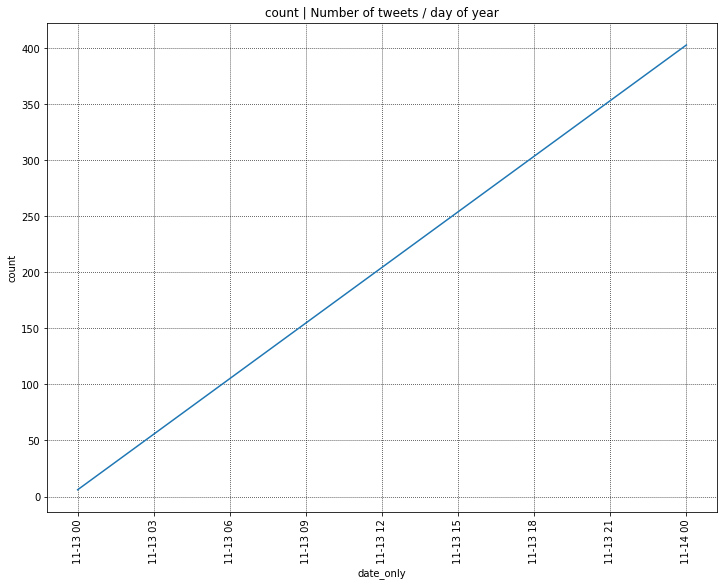

In [70]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)

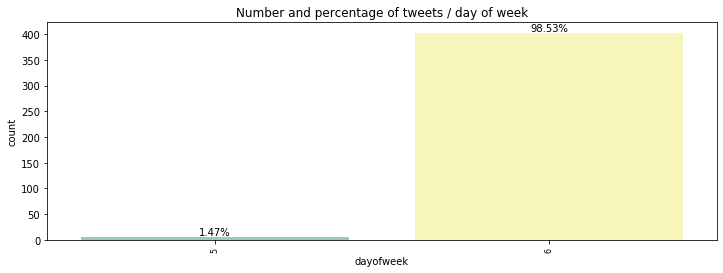

In [71]:
plot_count("dayofweek", "tweets / day of week", tweets_df, size=3, ordered=False)

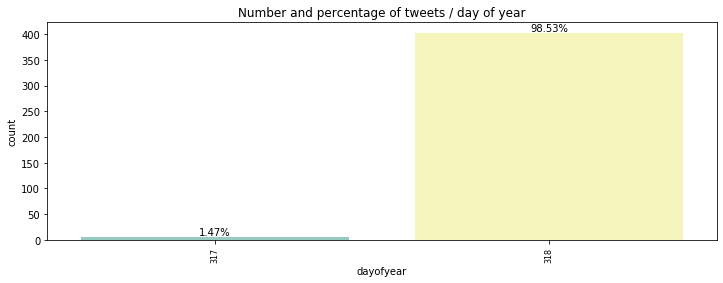

In [72]:
plot_count("dayofyear", "tweets / day of year", tweets_df, size=3, ordered=False)

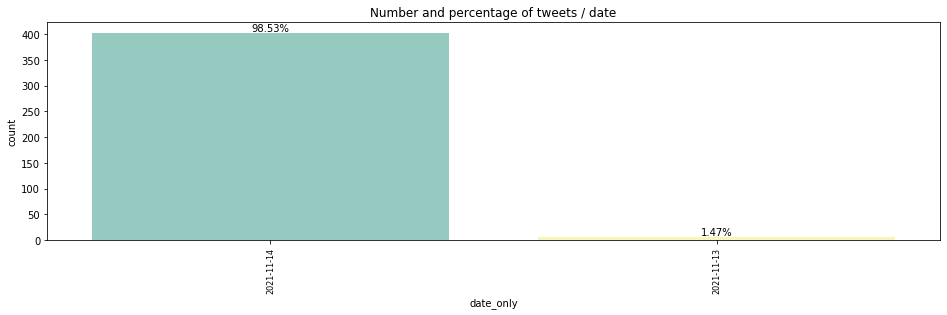

In [73]:
plot_count("date_only", "tweets / date", tweets_df,size=4, ordered=False)

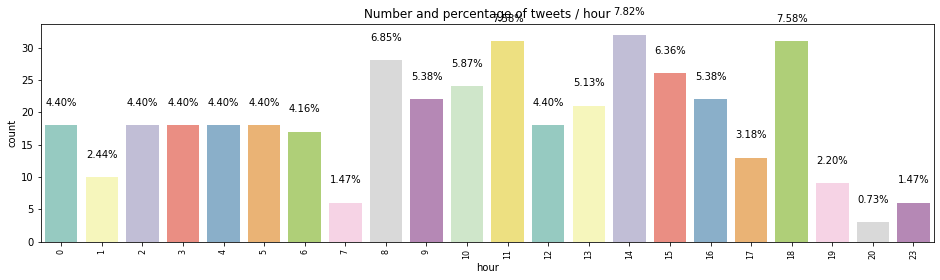

In [74]:
plot_count("hour", "tweets / hour", tweets_df,size=4, ordered=False)

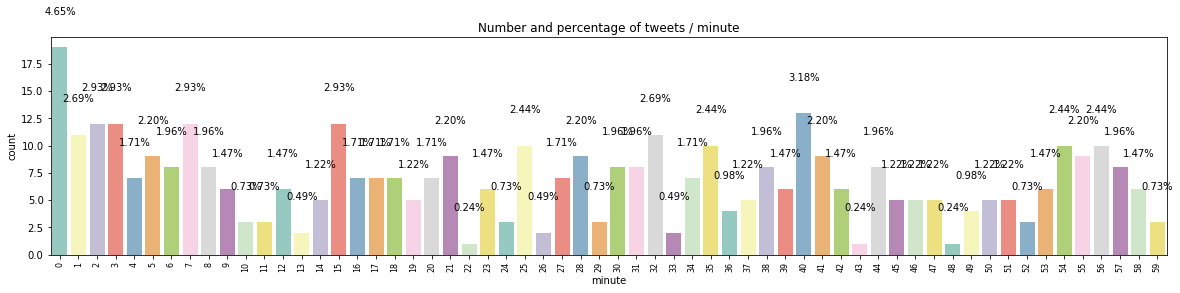

In [75]:
plot_count("minute", "tweets / minute", tweets_df,size=5, ordered=False)